<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/Ecuaciones_Diferenciales/blob/main/asesoria/ejer_sec_7_6_boyce/solucion_pvi_sistema_eigenvalores_complejos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/Ecuaciones_Diferenciales/blob/main/asesoria/ejer_sec_7_6_boyce/solucion_pvi_sistema_eigenvalores_complejos.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Un sistema lineal de primer orden con eigenvalores complejos que define un PVI

## Punto 1

1. **(15 puntos) Encontrar la solución**  

$$ x' = \begin{pmatrix}1&-12&-14\\1&2&-3\\1&1&-2\end{pmatrix}x, \ \ \ x(0) = \begin{pmatrix}4\\6\\-7\end{pmatrix} $$

2. **(10 puntos) Verifique** 

No puede omitir ningún paso de solución y de cálculo algoritmicos y debe describir verbalmente su procedimiento y justificar los pasos esenciales. 

## [Video de apoyo](https://www.youtube.com/watch?v=kf6h4qo-Kig)

# Solución con sympy

Empecemos por obtener los valores y vectores propios utilizando solo sympy 

In [ ]:
from sympy import * 
A = Matrix([[1,-12,-14],[1,2,-3],[1,1,-2]])
rv1,rv2,rv3 = A.eigenvects() 
rv3

In [ ]:
A.eigenvects() 

In [4]:
import numpy as np 
from sympy import *
t = symbols('t', real = True, nonegative = True)  
r1,r2,r3 = symbols('r1 r2 r3') 
v1,v2,v3 = symbols('v1 v2 v3') 

A = Matrix([[1,-12,-14],[1,2,-3],[1,1,-2]])  

r1, r2, r3 = A.eigenvects()[0][0]/A.eigenvects()[0][1], A.eigenvects()[1][0]/A.eigenvects()[1][1], A.eigenvects()[2][0]/A.eigenvects()[2][1]


v1,v2,v3 = A.eigenvects()[0][2][0], A.eigenvects()[1][2][0], A.eigenvects()[2][2][0] 

lambda1, mu1 = re(r1),im(r1)
lambda2, mu2 = re(r2),im(r2)
lambda3, mu3 = re(r3),im(r3) 

x_sup1_sympy = v1*( exp(lambda1*t)*( cos(mu1*t) + I*sin(mu1*t) ))
x_sup1_lambda = lambdify( t, x_sup1_sympy, 'numpy' ) 

x_sup2_sympy = v2*( exp(lambda2*t)*( cos(mu2*t) + I*sin(mu2*t) ) )


u_sympy = re( x_sup2_sympy ) 
v_sympy = im( x_sup2_sympy ) 

u_lambda = lambdify( t, u_sympy, 'numpy' ) 
v_lambda = lambdify( t, v_sympy, 'numpy' ) 

c1, c2, c3 = symbols('c1 c2 c3') 


x_sympy = c1*x_sup1_sympy + c2*u_sympy + c3*v_sympy

x_lambda = lambdify(t, x_sympy, 'numpy' ) # solución general de valor real

# note que la salida es un arreglo dos dimendional de numpy
x_sympy 

Matrix([
[25*c1*exp(t)/6 + c2*(-5*sin(5*t) + cos(5*t)) + c3*(-sin(5*t) - 5*cos(5*t))],
[                                -7*c1*exp(t)/6 + c2*cos(5*t) - c3*sin(5*t)],
[                                     c1*exp(t) + c2*cos(5*t) - c3*sin(5*t)]])

Ahora sustituyamos la condición inicial

In [5]:
# Initial conditions:
condi_1 = Eq(x_sympy[0].subs(t, 0), 4)  # x(0) = (4,6,-7)
condi_2 = Eq(x_sympy[1].subs(t, 0), 6)  # x(0) = (4,6,-7)
condi_3 = Eq(x_sympy[2].subs(t, 0), -7)  # x(0) = (4,6,-7)

In [6]:
display(condi_1, condi_2, condi_3) 

Eq(25*c1/6 + c2 - 5*c3, 4)

Eq(-7*c1/6 + c2, 6)

Eq(c1 + c2, -7)

In [7]:
c1c2c3_solucion = solve([condi_1,condi_2,condi_3], (c1,c2, c3))

In [8]:
c1c2c3_solucion

{c1: -6, c2: -1, c3: -6}

In [9]:
sol_pvi = x_sympy.subs(c1c2c3_solucion)
sol_pvi 

Matrix([
[-25*exp(t) + 11*sin(5*t) + 29*cos(5*t)],
[      7*exp(t) + 6*sin(5*t) - cos(5*t)],
[     -6*exp(t) + 6*sin(5*t) - cos(5*t)]])

### Verifiquemos la solución

In [10]:
diff(sol_pvi,t) == A*sol_pvi

True

Entonces, la función vectorial hallada satisface la ecuación diferencial del PVI

In [11]:
sol_pvi.subs(t,0) 

Matrix([
[ 4],
[ 6],
[-7]])

In [13]:
x_sympy = sol_pvi
x_sympy 

Matrix([
[-25*exp(t) + 11*sin(5*t) + 29*cos(5*t)],
[      7*exp(t) + 6*sin(5*t) - cos(5*t)],
[     -6*exp(t) + 6*sin(5*t) - cos(5*t)]])

In [14]:
x_lambda = lambdify(t,x_sympy, 'numpy') 

In [24]:
x_lambda(0)[1,0]

6.0

Por lo tanto, la solución encontrada es correcta. 

## Graficación de las funciones escalares $x_{1}(t)$, $x_{2}(t)$ y $x_{3}(t)$

$$ x = \begin{pmatrix} x_{1}(t) \\ x_{2}(t) \\ x_{3}(t) \end{pmatrix} $$


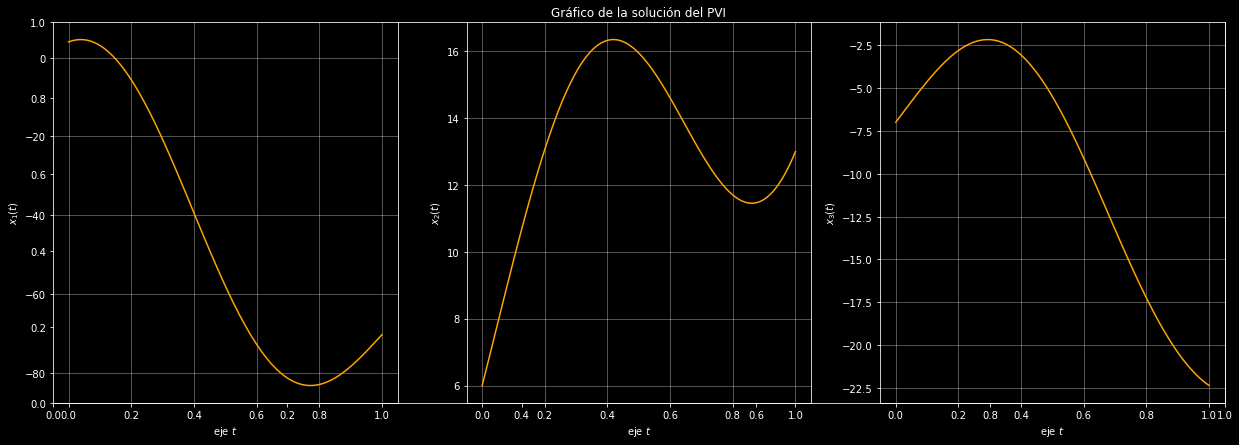

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.style.use('dark_background') 

fig = plt.figure(figsize = (21,7)) 

t = np.linspace(0,1,100)

plt.title('Gráfico de la solución del PVI')

ax1 = fig.add_subplot(131)
ax1.plot(t,x_lambda(t)[0,0], color = 'orange') 
ax1.set_xlabel(r'eje $t$')
ax1.set_ylabel(r'$x_{1}(t)$')
ax1.grid(True, alpha = 0.4)


ax2 = fig.add_subplot(132)
ax2.plot(t,x_lambda(t)[1,0], color = 'orange') 
ax2.set_xlabel(r'eje $t$')
ax2.set_ylabel(r'$x_{2}(t)$')
ax2.grid(True, alpha = 0.4)


ax3 = fig.add_subplot(133) 
ax3.plot(t,x_lambda(t)[2,0], color = 'orange') 
ax3.set_xlabel(r'eje $t$')
ax3.set_ylabel(r'$x_{3}(t)$')
ax3.grid(True, alpha = 0.4)

plt.savefig('solución_pvi.jpg')

plt.show() 


## Solución analítica 

Supongamos que la forma de la solución del problema $x' = Ax$ dado es $x = \xi e^{rt}$. 

Sustituir esta hipótesis en la ecuación $x' = Ax$ nos lleva a solucionar el sistema algebraico homogéneo

$$ (A - rI)\xi = 0 $$


y como buscamos soluciones no nulas para el sistema $x' = Ax$, entonces, requerimos el sistema algebraico homogéneo anterior tenga infinitas soluciones, lo que se logra hallando $r$ ta que el determinante de la matriz de coeficientes $A - rI$ sea nulo

Resolvamos pues la ecuación algebraica 

$$ det(A - rI) = 0 $$

para hallar los $r$ de la solución $x = \xi e^{rt}$. 


\begin{align*}
det(A - rI) = 0 & \Rightarrow \left|\begin{matrix}1-r&-12&-14\\1&2-r&-3\\1&1&-2-r\end{matrix}   \right| = 0 
\end{align*}

$$ +(1)\left| \begin{matrix} -12 & -14 \\ 2-r & -3 \end{matrix} \right|  - (1)\left| \begin{matrix} 1-r & 1 \\ -3 & -3 \end{matrix} \right| +  (-2-r)\left| \begin{matrix} 1-r & -12 \\ 1 & 2-r \end{matrix} \right| = 0 $$

## Punto 2

1. **(15 puntos) Encontrar la solución**  

$$ x' = \begin{pmatrix}6&-1\\5&4\end{pmatrix}x, \ \ \ x(0) = \begin{pmatrix}-2\\8\end{pmatrix} $$

2. **(10 puntos) Verifique** 

No puede omitir ningún paso de solución y de cálculo algoritmicos y debe describir verbalmente su procedimiento y justificar los pasos esenciales. 

In [ ]:
from sympy import *
A = Matrix([[1,-12,-14],[1,2,-3],[1,1,-2]])  
r_vec1, r_vec2, r_vec3 = A.eigenvects() 
r_vec1  

In [ ]:
import numpy as np 
from sympy import *
t = symbols('t') 
A = Matrix([[1,-12,-14],[1,2,-3],[1,1,-2]])  
r1,r2,r3 = A.eigenvals().keys()  # obtendrás un diccionario 
v1,v2,v3 = A.eigenvects()[0][2][0],A.eigenvects()[1][2][0],A.eigenvects()[2][2][0] 
lambda1, mu1 = re(r1),im(r1)
lambda2, mu2 = re(r2),re(r2)
lambda3, mu3 = re(r3),im(r3) 
x_sup1 = lambdify(t,v1*(exp(lambda1*t)*cos(mu1*t) + 1*I*sin(mu1*t))) 
u = lambdify(t,re(v2*(exp(lambda2*t)*cos(mu2*t) + 1*I*sin(mu2*t)))) 
v = lambdify(t,im(v2*(exp(lambda2*t)*cos(mu2*t) + 1*I*sin(mu2*t))))  
c1,c2,c3 = 1,1,1
x = lambda t:c1*x_sup1(t) + c2*u(t) + c3*v(t) 

In [ ]:
from sympy import *
A = Matrix(A)
A.eigenvects() 

## Punto 3

1. **(15 puntos) Encontrar la solución**  

$$ x' = \begin{pmatrix}4&0&1\\0&6&0\\-4&0&4\end{pmatrix}x $$

2. **(10 puntos) Verifique** 

No puede omitir ningún paso de solución y de cálculo algoritmicos y debe describir verbalmente su procedimiento y justificar los pasos esenciales. 

In [ ]:
from sympy import *
A = Matrix([[1,-12,-14],[1,2,-3],[1,1,-2]])  
r_vec1, r_vec2, r_vec3 = A.eigenvects() 
r_vec1  

In [ ]:
import numpy as np 
from sympy import *
t = symbols('t') 
A = Matrix([[1,-12,-14],[1,2,-3],[1,1,-2]])  
r1,r2,r3 = A.eigenvals().keys()  # obtendrás un diccionario 
v1,v2,v3 = A.eigenvects()[0][2][0],A.eigenvects()[1][2][0],A.eigenvects()[2][2][0] 
lambda1, mu1 = re(r1),im(r1)
lambda2, mu2 = re(r2),re(r2)
lambda3, mu3 = re(r3),im(r3) 
x_sup1 = lambdify(t,v1*(exp(lambda1*t)*cos(mu1*t) + 1*I*sin(mu1*t))) 
u = lambdify(t,re(v2*(exp(lambda2*t)*cos(mu2*t) + 1*I*sin(mu2*t)))) 
v = lambdify(t,im(v2*(exp(lambda2*t)*cos(mu2*t) + 1*I*sin(mu2*t))))  
c1,c2,c3 = 1,1,1
x = lambda t:c1*x_sup1(t) + c2*u(t) + c3*v(t) 